In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing
import patsy

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import r2_score
%matplotlib inline

In [2]:
with open('BG_df.pickle','rb') as read_file:
    BG_df = pickle.load(read_file)

In [3]:
BG_df

complexity  playingtime  \
name                                                                          
(Instinct, Instinct)                                    1.3636         20.0   
(Heckmeck Barbecue, Heckmeck Barbecue)                  1.4815         25.0   
(Circadians: First Light, Circadians: First Light)      3.4861         90.0   
(The Ravens of Thri Sahashri, The Ravens of Thr...      3.4054         45.0   
(The Battle of Monmouth, The Battle of Monmouth)        2.6842        180.0   
...                                                        ...          ...   
(Expancity, Expancity)                                  2.0000         90.0   
(TurfMaster, TurfMaster)                                1.9681         75.0   
(Import / Export, Import / Export)                      3.2174         90.0   
(The Balkan Wars: Prelude to Disaster, 1912-191...      2.9474        120.0   
(Nuns on the Run, Nuns on the Run)                      2.0791         45.0   

                                                    user_rating  desc_wc  \
name                                                                       
(Instinct, Instinct)                                    5.72657     34.0   
(Heckmeck Barbecue, Heckmeck Barbecue)                  6.24042    156.0   
(Circadians: First Light, Circadians: First Light)      7.81810    247.0   
(The Ravens of Thri Sahashri, The Ravens of Thr...      7.22181    294.0   
(The Battle of Monmouth, The Battle of Monmouth)        6.63136    192.0   
...                                                         ...      ...   
(Expancity, Expancity)                                  6.95426    106.0   
(TurfMaster, TurfMaster)                                7.23507    402.0   
(Import / Export, Import / Export)                      7.34257    131.0   
(The Balkan Wars: Prelude to Disaster, 1912-191...      6.60899    105.0   
(Nuns on the Run, Nuns on the Run)                      6.51516    228.0   

                                                    forums  num_ratings  \
name                                                                      
(Instinct, Instinct)                                   2.0        134.0   
(Heckmeck Barbecue, Heckmeck Barbecue)                 4.0        413.0   
(Circadians: First Light, Circadians: First Light)   112.0        823.0   
(The Ravens of Thri Sahashri, The Ravens of Thr...   153.0         11.0   
(The Battle of Monmouth, The Battle of Monmouth)       5.0        118.0   
...                                                    ...          ...   
(Expancity, Expancity)                                46.0        564.0   
(TurfMaster, TurfMaster)                             132.0        945.0   
(Import / Export, Import / Export)                   128.0        645.0   
(The Balkan Wars: Prelude to Disaster, 1912-191...     5.0         89.0   
(Nuns on the Run, Nuns on the Run)                   234.0         37.0   

                                                    num_mechanics  \
name                                                                
(Instinct, Instinct)                                          2.0   
(Heckmeck Barbecue, Heckmeck Barbecue)                        2.0   
(Circadians: First Light, Circadians: First Light)            8.0   
(The Ravens of Thri Sahashri, The Ravens of Thr...            6.0   
(The Battle of Monmouth, The Battle of Monmouth)              4.0   
...                                                           ...   
(Expancity, Expancity)                                        4.0   
(TurfMaster, TurfMaster)                                      3.0   
(Import / Export, Import / Export)                            7.0   
(The Balkan Wars: Prelude to Disaster, 1912-191...            3.0   
(Nuns on the Run, Nuns on the Run)                            8.0   

                                                    kickstarted  CardDrafting  \
name                                                                            

In [4]:
Xcols = ['playsperowner', 'pageviewsperplay', 'playingtime', 'user_rating', 'desc_wc', 'forums',
        'num_ratings', 'num_mechanics', 'kickstarted', 'CardDrafting', 'DiceRolling', 'HandManagement',
        'HexagonGrid', 'ModularBoard', 'SetCollection', 'Simulation', 'TilePlacement', 'VariablePlayerPowers', 
        'AbstractGames', 'PartyGames', 'StrategyGames', 'ThematicGames', 'Wargames']
X = BG_df.loc[:, Xcols]

y = BG_df['complexity']

In [5]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('complexity ~ playsperowner + pageviewsperplay + playingtime + user_rating + desc_wc + forums + num_ratings + num_mechanics + kickstarted + CardDrafting + DiceRolling + HandManagement + HexagonGrid + ModularBoard + SetCollection + Simulation + TilePlacement + VariablePlayerPowers + AbstractGames + PartyGames + StrategyGames + ThematicGames + Wargames', data=BG_df, return_type="dataframe")

# Create your model
BG_lm1 = sm.OLS(y, X)

# Fit your model to your training set
fit = BG_lm1.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             complexity   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     51.58
Date:                Mon, 20 Jul 2020   Prob (F-statistic):          1.11e-106
Time:                        08:41:24   Log-Likelihood:                -326.61
No. Observations:                 510   AIC:                             695.2
Df Residuals:                     489   BIC:                             784.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3045      0.211     -1.443      0.150      -0.719       0.110
playsperowner           -0.0933      0.018     -5.066      0.000      -0.129      -0.057
pageviewsperplay         0.0002      5e-05      4.356      0.000       0.000       0.000
playingtime              0.0027      0.000      8.915      0.000       0.002       0.003
user_rating              0.3035      0.037      8.157      0.000       0.230       0.377
desc_wc                  0.0004      0.000      1.789      0.074   -3.53e-05       0.001
forums                   0.0006      0.000      1.942      0.053   -6.91e-06       0.001
num_ratings           5.918e-05   8.91e-05      0.664      0.507      -0.000       0.000
num_mechanics            0.0437      0.017      2.584      0.010       0.010       0.077
kickstarted              0.0520      0.070      0.739      0.460      -0.086       0.190
CardDrafting         -1.661e-17   3.36e-17     -0.495      0.621   -8.26e-17    4.93e-17
DiceRolling             -0.1143      0.053     -2.138      0.033      -0.219      -0.009
HandManagement          -0.0683      0.058     -1.185      0.236      -0.182       0.045
HexagonGrid              0.0304      0.085      0.359      0.719      -0.136       0.197
ModularBoard             0.0441      0.078      0.567      0.571      -0.109       0.197
SetCollection           -0.1286      0.067     -1.933      0.054      -0.259       0.002
Simulation              -0.0045      0.081     -0.056      0.956      -0.163       0.154
TilePlacement            0.0999      0.076      1.312      0.190      -0.050       0.250
VariablePlayerPowers     0.0644      0.071      0.907      0.365      -0.075       0.204
AbstractGames          1.88e-18   5.92e-18      0.317      0.751   -9.76e-18    1.35e-17
PartyGames           -1.417e-17      1e-17     -1.412      0.159   -3.39e-17    5.56e-18
StrategyGames            0.4480      0.058      7.774      0.000       0.335       0.561
ThematicGames            0.1893      0.072      2.612      0.009       0.047       0.332
Wargames                 0.1684      0.080      2.112      0.035       0.012       0.325
==============================================================================
Omnibus:                       19.426   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.781
Skew:                           0.455   Prob(JB):                     3.07e-05
Kurtosis:                       3.389   Cond. No.                     4.68e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-33. This might indicate that there are
strong multicollinearity pr

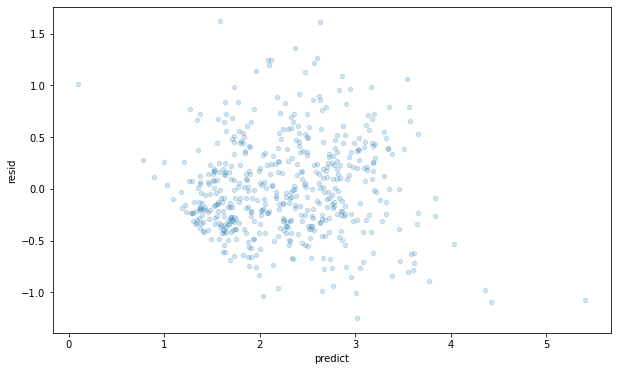

In [6]:
BG_df['predict'] = fit.predict(X)
BG_df['resid'] = BG_df.complexity-BG_df.predict
plot=BG_df.plot(kind='scatter', x='predict',y='resid',alpha=0.2,figsize=(10,6))
#plt.savefig('initial_BG_residuals_linear')

In [7]:
BG_ols = sm.OLS(y, X, data=BG_df)
results = BG_ols.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             complexity   R-squared:                       0.678
Model:                            OLS   Adj. R-squared:                  0.665
Method:                 Least Squares   F-statistic:                     51.58
Date:                Mon, 20 Jul 2020   Prob (F-statistic):          1.11e-106
Time:                        08:41:24   Log-Likelihood:                -326.61
No. Observations:                 510   AIC:                             695.2
Df Residuals:                     489   BIC:                             784.1
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.3045      0.211     -1.443      0.150      -0.719       0.110
playsperowner           -0.0933      0.018     -5.066      0.000      -0.129      -0.057
pageviewsperplay         0.0002      5e-05      4.356      0.000       0.000       0.000
playingtime              0.0027      0.000      8.915      0.000       0.002       0.003
user_rating              0.3035      0.037      8.157      0.000       0.230       0.377
desc_wc                  0.0004      0.000      1.789      0.074   -3.53e-05       0.001
forums                   0.0006      0.000      1.942      0.053   -6.91e-06       0.001
num_ratings           5.918e-05   8.91e-05      0.664      0.507      -0.000       0.000
num_mechanics            0.0437      0.017      2.584      0.010       0.010       0.077
kickstarted              0.0520      0.070      0.739      0.460      -0.086       0.190
CardDrafting         -1.661e-17   3.36e-17     -0.495      0.621   -8.26e-17    4.93e-17
DiceRolling             -0.1143      0.053     -2.138      0.033      -0.219      -0.009
HandManagement          -0.0683      0.058     -1.185      0.236      -0.182       0.045
HexagonGrid              0.0304      0.085      0.359      0.719      -0.136       0.197
ModularBoard             0.0441      0.078      0.567      0.571      -0.109       0.197
SetCollection           -0.1286      0.067     -1.933      0.054      -0.259       0.002
Simulation              -0.0045      0.081     -0.056      0.956      -0.163       0.154
TilePlacement            0.0999      0.076      1.312      0.190      -0.050       0.250
VariablePlayerPowers     0.0644      0.071      0.907      0.365      -0.075       0.204
AbstractGames          1.88e-18   5.92e-18      0.317      0.751   -9.76e-18    1.35e-17
PartyGames           -1.417e-17      1e-17     -1.412      0.159   -3.39e-17    5.56e-18
StrategyGames            0.4480      0.058      7.774      0.000       0.335       0.561
ThematicGames            0.1893      0.072      2.612      0.009       0.047       0.332
Wargames                 0.1684      0.080      2.112      0.035       0.012       0.325
==============================================================================
Omnibus:                       19.426   Durbin-Watson:                   1.916
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.781
Skew:                           0.455   Prob(JB):                     3.07e-05
Kurtosis:                       3.389   Cond. No.                     4.68e+20
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.04e-33. This might indicate that there are
strong multicollinearity pr

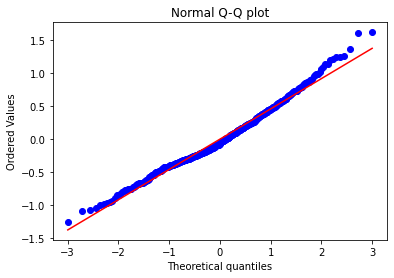

In [8]:
stats.probplot(BG_df['resid'], dist="norm", plot=plt)
plt.title("Normal Q-Q plot")
plt.show()
#plt.savefig('initialQQplot')

In [9]:
#Split 60-20-20 into train, val, test groups
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=.25)

(array([171.,  78.,  24.,  14.,  13.,   0.,   4.,   0.,   1.,   1.]),
 array([-0.92522553, -0.21344602,  0.4983335 ,  1.21011301,  1.92189252,
         2.63367203,  3.34545154,  4.05723106,  4.76901057,  5.48079008,
         6.19256959]),
 <a list of 10 Patch objects>)

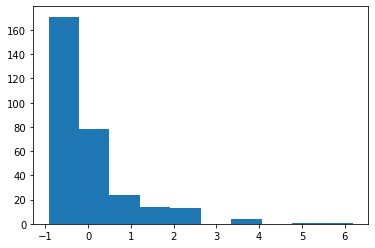

In [29]:
#fit standard scaler to my training data
std = StandardScaler()
std.fit(X_train.values)

#now apply the standard scaler to the X_train set and the X_test set
X_tr = std.transform(X_train.values)
X_te = std.transform(X_test.values)
X_vali = std.transform(X_val.values)

#and confirm that it worked
plt.hist(X_tr[:,3])

In [11]:
BG_lasso = Lasso(alpha = 0.01)
BG_lasso.fit(X_tr, y_train)

Lasso(alpha=0.01)

In [12]:
list(zip(Xcols, BG_lasso.coef_))

[('playsperowner', 0.0),
 ('pageviewsperplay', -0.12174668900037426),
 ('playingtime', 0.1201711817153493),
 ('user_rating', 0.2580541435496064),
 ('desc_wc', 0.2271868686055142),
 ('forums', 0.00566111199878619),
 ('num_ratings', 0.05584877362908479),
 ('num_mechanics', 0.03327282930301277),
 ('kickstarted', 0.06428238794951377),
 ('CardDrafting', 0.0),
 ('DiceRolling', 0.0),
 ('HandManagement', -0.03418459842143392),
 ('HexagonGrid', -0.010228601502538995),
 ('ModularBoard', 0.02652019758962168),
 ('SetCollection', 0.01004742349939997),
 ('Simulation', -0.03359175908905583),
 ('TilePlacement', 0.005039315104293974),
 ('VariablePlayerPowers', 0.02960497028552288),
 ('AbstractGames', 0.05650784680694128),
 ('PartyGames', 0.0),
 ('StrategyGames', 0.0),
 ('ThematicGames', 0.16194315559730987),
 ('Wargames', 0.05261374302002076)]

In [13]:
alphavec = 10**np.linspace(-2,2,200)

BG_lassoCV = LassoCV(alphas = alphavec, cv=5)
BG_lassoCV.fit(X_tr, y_train)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LassoCV(alphas=array([1.00000000e-02, 1.04737090e-02, 1.09698580e-02, 1.14895100e-02,
       1.20337784e-02, 1.26038293e-02, 1.32008840e-02, 1.38262217e-02,
       1.44811823e-02, 1.51671689e-02, 1.58856513e-02, 1.66381689e-02,
       1.74263339e-02, 1.82518349e-02, 1.91164408e-02, 2.00220037e-02,
       2.09704640e-02, 2.19638537e-02, 2.30043012e-02, 2.40940356e-02,
       2.52353917e-02, 2.64308149e-0...
       3.44896226e+01, 3.61234270e+01, 3.78346262e+01, 3.96268864e+01,
       4.15040476e+01, 4.34701316e+01, 4.55293507e+01, 4.76861170e+01,
       4.99450512e+01, 5.23109931e+01, 5.47890118e+01, 5.73844165e+01,
       6.01027678e+01, 6.29498899e+01, 6.59318827e+01, 6.90551352e+01,
       7.23263390e+01, 7.57525026e+01, 7.93409667e+01, 8.30994195e+01,
       8.70359136e+01, 9.11588830e+01, 9.54771611e+01, 1.00000000e+02]),
        cv=5)

In [14]:
BG_lassoCV.alpha_

0.030367711180354574

In [15]:
#lassoCV coeffs
list(zip(Xcols, BG_lassoCV.coef_))

[('playsperowner', 0.0),
 ('pageviewsperplay', -0.10611090531199026),
 ('playingtime', 0.10687192981302276),
 ('user_rating', 0.2671022131227952),
 ('desc_wc', 0.2270160573967865),
 ('forums', 0.0002020067832272719),
 ('num_ratings', 0.048841630650879105),
 ('num_mechanics', 0.012378632199317025),
 ('kickstarted', 0.057741816285580796),
 ('CardDrafting', 0.0),
 ('DiceRolling', 0.0),
 ('HandManagement', -0.0),
 ('HexagonGrid', -0.0),
 ('ModularBoard', 0.00884325629531597),
 ('SetCollection', 0.0),
 ('Simulation', -0.015410199677693302),
 ('TilePlacement', 0.0),
 ('VariablePlayerPowers', 0.0031606694828402756),
 ('AbstractGames', 0.034941579433807594),
 ('PartyGames', 0.0),
 ('StrategyGames', 0.0),
 ('ThematicGames', 0.14040035577216467),
 ('Wargames', 0.02684096884764882)]

In [16]:
test_set_pred = BG_lassoCV.predict(X_te)

In [17]:
#r^2 from lassoCV on train/test
r2_score(y_test, test_set_pred)

0.6907302124210284

In [18]:
BG_df = BG_df.drop(['num_ratings', 'num_mechanics', 'kickstarted', 'CardDrafting',
                    'Simulation', 'AbstractGames', 'PartyGames'], axis=1)

smallerXcols = (['playsperowner', 'pageviewsperplay', 'playingtime', 'user_rating', 'desc_wc', 'forums',
                 'DiceRolling', 'HandManagement', 'HexagonGrid', 'ModularBoard', 'SetCollection', 'TilePlacement',
                 'VariablePlayerPowers', 'StrategyGames', 'ThematicGames', 'Wargames'])

In [19]:
smallerXcols = (['playsperowner', 'pageviewsperplay', 'playingtime', 'user_rating', 'desc_wc', 'forums',
                 'DiceRolling', 'HandManagement', 'HexagonGrid', 'ModularBoard', 'SetCollection', 'TilePlacement',
                 'VariablePlayerPowers', 'StrategyGames', 'ThematicGames', 'Wargames'])

In [20]:
#applying the standard scaler to the newly combined train set and the validation set
new_X_train = pd.concat([X_train, X_test])
new_y_train = pd.concat([y_train, y_test])
new_X_tr = std.transform(new_X_train.values)
new_X_val = std.transform(X_val.values)

In [21]:
#running a final lasso against validation
BG_lr_model_lasso = Lasso(alpha = BG_lassoCV.alpha_)
BG_lr_model_lasso.fit(new_X_tr, new_y_train)

list(zip(X_train.columns, BG_lr_model_lasso.coef_))

[('Intercept', 0.0),
 ('playsperowner', -0.12134202925790037),
 ('pageviewsperplay', 0.11594636965720691),
 ('playingtime', 0.2534659532745954),
 ('user_rating', 0.23401992392184384),
 ('desc_wc', 0.026061518296698772),
 ('forums', 0.05528615479451203),
 ('num_ratings', 0.0),
 ('num_mechanics', 0.04927925552783785),
 ('kickstarted', 0.0),
 ('CardDrafting', 0.0),
 ('DiceRolling', -0.0),
 ('HandManagement', -0.0),
 ('HexagonGrid', 0.0),
 ('ModularBoard', 0.0),
 ('SetCollection', -0.009848072758912745),
 ('Simulation', 0.0),
 ('TilePlacement', 0.0),
 ('VariablePlayerPowers', 0.023720484576958623),
 ('AbstractGames', 0.0),
 ('PartyGames', 0.0),
 ('StrategyGames', 0.14814714687862193),
 ('ThematicGames', 0.033263450971894114),
 ('Wargames', 0.04402289050542797)]

In [30]:
valid_set_pred = BG_lassoCV.predict(X_vali)

In [33]:
#validation score for lasso linear model (this became final model/score for presentation)
r2_score(y_val, valid_set_pred)

0.6431606724523429

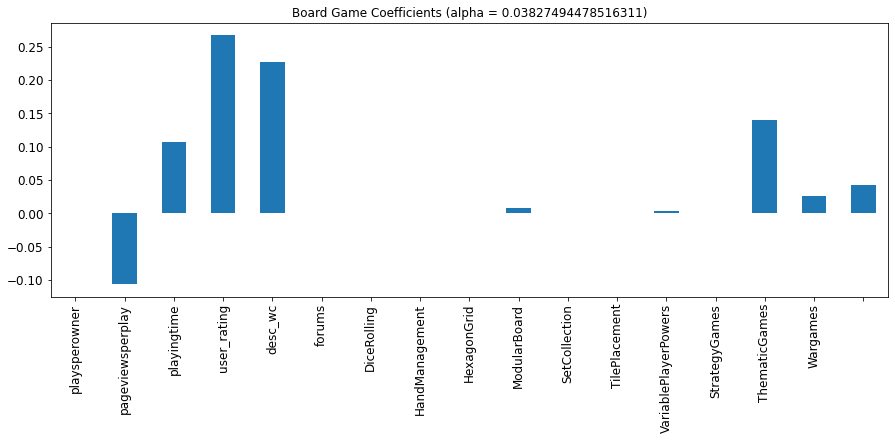

In [34]:
lasso_df_for_plot = pd.DataFrame(BG_lassoCV.coef_).drop([6,7,8,9,15,18,19])
ax = (lasso_df_for_plot.plot(kind='bar', title ="Board Game Coefficients (alpha = 0.03827494478516311)",
                      figsize=(15, 10), legend=False, fontsize=12))
ax.set_xticklabels(smallerXcols)
plt.gcf().subplots_adjust(bottom=0.5)
plt.savefig('coeffs_better_BG');

In [35]:
BG_lassoCV.coef_

array([ 0.00000000e+00, -1.06110905e-01,  1.06871930e-01,  2.67102213e-01,
        2.27016057e-01,  2.02006783e-04,  4.88416307e-02,  1.23786322e-02,
        5.77418163e-02,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  8.84325630e-03,  0.00000000e+00, -1.54101997e-02,
        0.00000000e+00,  3.16066948e-03,  3.49415794e-02,  0.00000000e+00,
        0.00000000e+00,  1.40400356e-01,  2.68409688e-02,  4.19997041e-02])